# Imports

In [1]:
from env import user, password, host

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import acquire
import prepare

# Acquire Data

In [2]:
telco = acquire.get_telco_data()

In [3]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


# Prepare

## Split Data into train, test, validate
Random seed has been set to 123 and train size for the train size is set at .8 for both the train test split and the validate split.

## Clean the Data

- Surprisingly, it looks like we don't have any nulls within the data
- We can patch out the type id's, since they were only useful for merging
    * We could've also done this in SQL, but I prefer getting to python as soon as possible
- Fields to look at:
    * gender: Currently an object, likely needs to be encoded
    * senior_citizen: It's an int type, does that mean it's encoded already?
    * partner: I have no clue what this field is for
    * dependents: Currently an object, either it's a bool or should be an int identifying how many dependents
    * phone_service - paperless_billing: Needs to be encoded
    * total_charges: Definitely should not be an object, likely needs to be a float
    * churn: Probably needs to be encoded

In [4]:
train, test, validate = prepare.prep_telco(telco, .8, 123)

In [5]:
train.sample(4)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
1429,3648-GZPHF,Male,0,Yes,Yes,32,No,No phone service,No,No,...,Yes,No,No,Yes,36.25,1151.05,No,One year,DSL,Mailed check
1639,7184-LRUUR,Female,0,No,No,22,Yes,No,No,Yes,...,No,Yes,No,No,65.25,1441.8,No,One year,DSL,Bank transfer (automatic)
3236,3768-NLUBH,Male,1,Yes,No,57,Yes,Yes,No,No,...,No,Yes,Yes,No,100.60,5746.15,Yes,Month-to-month,Fiber optic,Electronic check
6312,7328-OWMOM,Female,0,No,Yes,31,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.10,589.25,No,One year,None,Credit card (automatic)


In [6]:
print(train.shape)
print(test.shape)
print(validate.shape)

(4507, 21)
(1409, 21)
(1127, 21)


In [7]:
train.dtypes

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [8]:
train.churn.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
train.contract_type.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [10]:
# encoder = LabelEncoder()
# encoder.fit(train.contract_type)
# train["contract_type_encoded"] = encoder.transform(train.contract_type)
# test["contract_type_encoded"] = encoder.transform(test.contract_type)
# validate["contract_type_encoded"] = encoder.transform(validate.contract_type)

In [11]:
def encode_contract_types(train, test, validate):
    '''Takes in train, test and validate dataframes
    Returns each df with a new coloumn for encoded contract types 
    as well as the encoder used'''
    encoder = LabelEncoder()
    encoder.fit(train.contract_type)
    train["contract_type_encoded"] = encoder.transform(train.contract_type)
    test["contract_type_encoded"] = encoder.transform(test.contract_type)
    validate["contract_type_encoded"] = encoder.transform(validate.contract_type)
    return encoder, train, test, validate

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type_encoded
1249,0484-FFVBJ,Male,0,No,No,32,Yes,No,No,No,...,Yes,Yes,Yes,64.85,2010.95,No,One year,DSL,Bank transfer (automatic),1
6265,6096-EGVTU,Female,0,Yes,Yes,64,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No,24.90,1595.5,No,One year,None,Mailed check,1
3772,6178-KFNHS,Female,0,No,Yes,12,Yes,Yes,Yes,No,...,No,No,Yes,78.30,909.25,Yes,Month-to-month,Fiber optic,Electronic check,0
3391,4529-CKBCL,Female,0,No,No,2,Yes,No,No,No,...,Yes,No,Yes,80.20,146.05,Yes,Month-to-month,Fiber optic,Electronic check,0
6795,6048-NJXHX,Male,0,Yes,No,41,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Yes,19.75,899.45,No,Two year,None,Electronic check,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic),2
817,6629-CZTTH,Male,0,No,No,1,Yes,No,No,No,...,No,Yes,Yes,55.70,55.7,Yes,Month-to-month,DSL,Mailed check,0
901,7377-DMMRI,Male,0,No,No,2,Yes,No,Yes,No,...,No,No,Yes,47.80,92.45,Yes,Month-to-month,DSL,Electronic check,0
1987,3400-ESFUW,Male,0,Yes,Yes,55,Yes,No,Yes,Yes,...,No,No,No,57.55,3046.4,Yes,Two year,DSL,Bank transfer (automatic),2


# Explore

Our positive is churning and negative is not churning

Look at groupings of customers who are churning and are not churning:

Create a swarmplot and boxplot:
   - X = melt data that is numeric and label as "measurements"
   - Y = values

Is there a clear pattern? Any ideas on what is going on?

NameError: name 'df_melt' is not defined

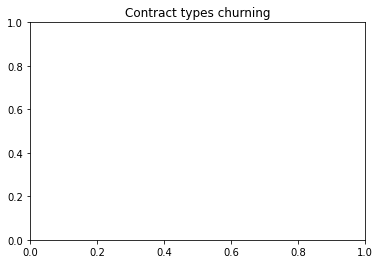

In [13]:
plt.title("Contract types churning")
sns.swarmplot(x="measurement", y="value", data=df_melt, hue="churning")

plt.show